In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the data set and display the first 5 data.

data = pd.read_csv("C://Users//dell//Desktop//CodSoft Internship Projects//Titanic Survival Prediction//Titanic-Dataset.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for missing data

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# In the missing data, I fill the age data with the mean and remove the other two from the data.

# Drop
data.drop("Cabin", axis=1, inplace=True)
data.drop("Embarked", axis=1, inplace=True)

# Average
average_age = data['Age'].mean()
data['Age'].fillna(average_age, inplace=True)

In [8]:
# Check for missing data

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64


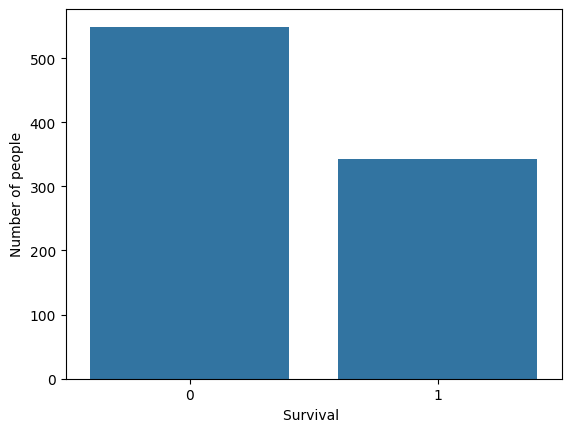

In [10]:
# Let's see the number of survivors and non-survivors.

sns.countplot(data=data, x="Survived")
plt.xlabel('Survival ')
plt.ylabel('Number of people');

print(data.value_counts("Survived"))

In [11]:
# Let's calculate the proportion of passengers who survived.

Survived = data['Survived'].sum()
total_passengers = len(data)
hayatta_kalan_orani = Survived / total_passengers

print("Survival rate on the Titanic: {:.2f}%".format(hayatta_kalan_orani * 100))

Survival rate on the Titanic: 38.38%


Sex
male      577
female    314
Name: count, dtype: int64


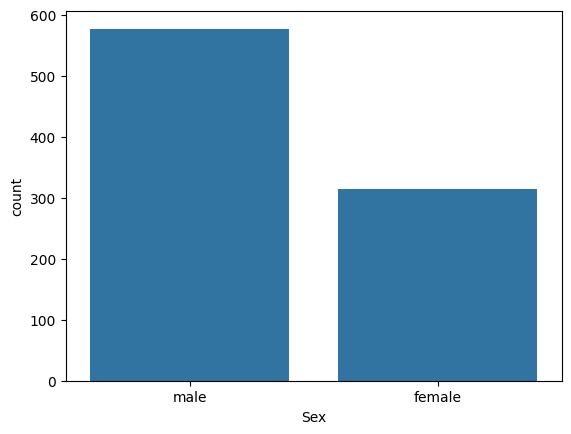

In [12]:
# How many men and how many women are on the Titanic?

sns.countplot(data=data, x="Sex")
print(data.value_counts("Sex"))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


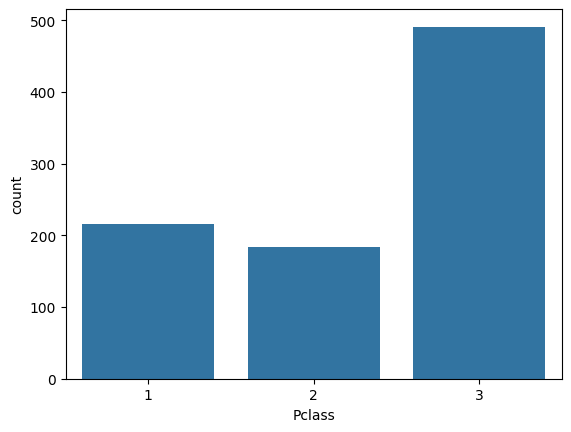

In [14]:
# Ticket class 

sns.countplot(data=data, x="Pclass")
print(data.value_counts("Pclass"))

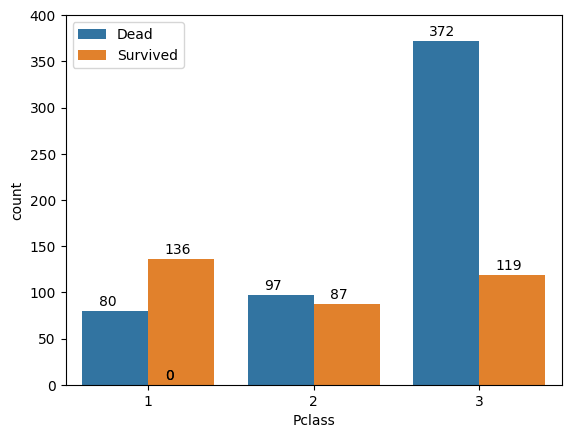

In [15]:
# A graph of Titanic survivors by class.

ax = sns.countplot(x="Pclass", data=data, hue="Survived")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0, 400)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Dead", "Survived"])

plt.show()

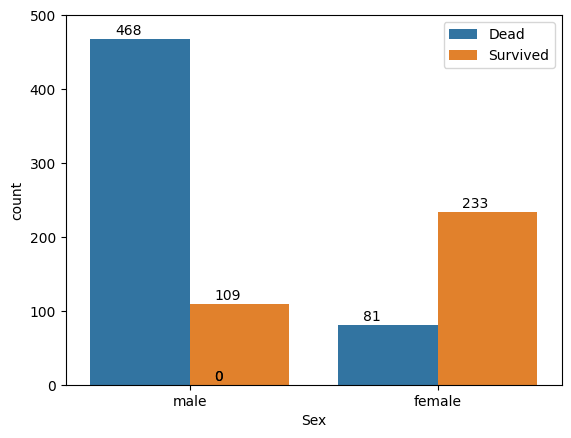

In [16]:
# Chart of Titanic survivors by gender.

ax = sns.countplot(x="Sex", data=data, hue="Survived")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0, 500)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["Dead", "Survived"])

plt.show()

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

In [18]:
# I separate the target variable and other variables.
# We separate data that will have no impact on the outcome.

X = data.drop(["PassengerId","Name","Ticket", "Survived"], axis=1)
y = data["Survived"]

X = pd.get_dummies(X, drop_first=True)

X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,True
1,1,38.0,1,0,71.2833,False
2,3,26.0,0,0,7.9250,False


In [19]:
# I divide the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

# Scaling the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's see the latest data quantities
print("X_train_scaled shape:",X_train.shape)
print("X_test_scaled shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train_scaled shape: (623, 6)
X_test_scaled shape: (268, 6)
y_train shape: (623,)
y_test shape: (268,)


In [20]:
# Possible hyperparameters for SVM.

svm = SVC(random_state=123)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly'],
    "degree" : [2,3,4]    
}

# Training
svm_g = GridSearchCV(estimator = svm, param_grid = param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

svm_g.fit(X_train_scaled, y_train)

# Best parameters
best_params = svm_g.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 100, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [21]:
# Model performance

pred_svm_g = svm_g.predict(X_test_scaled)
print(classification_report(y_test, pred_svm_g))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       153
           1       0.82      0.67      0.74       115

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



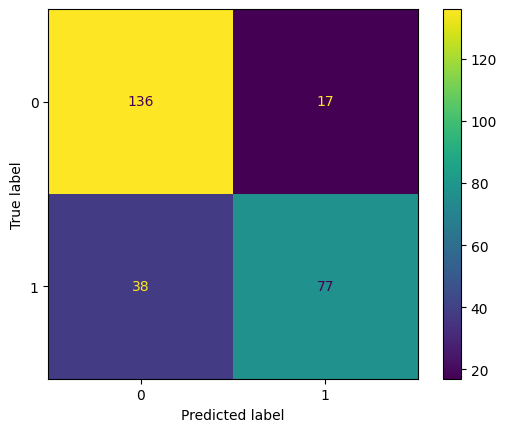

In [22]:
# Confusion matrix

ConfusionMatrixDisplay.from_estimator(svm_g, X_test_scaled, y_test);

In [23]:
# Accuracy score

accuracy = accuracy_score(y_test, pred_svm_g)
print("SVM Grid Accuracy:", accuracy)

SVM Grid Accuracy: 0.7947761194029851
